In [86]:
import pandas as pd


In [87]:
rides_data = pd.read_csv(r"D:\WORK\datascience\practice\Rides-Data-Analysis\rides_data_practice_with_times.csv")

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

inde = rides_data[['Distance_km','Duration_min']]
depe = rides_data['Fare']

inde_train, inde_test, depe_train, depe_test = train_test_split(inde, depe, test_size=0.3, random_state=42)

scalar = StandardScaler()
inde_train_stan = scalar.fit_transform(inde_train)
inde_test_stan = scalar.transform(inde_test)

model = LinearRegression()
model.fit(inde_train_stan,depe_train)

predict = model.predict(inde_test_stan)

mse = mean_squared_error(depe_test,predict)
mae = mean_absolute_error(depe_test,predict)
r2 = r2_score(depe_test,predict)

print(f'mean_absolute_error : {mae :.2f}')
print(f'mean_squared_error : {mse :.2f}')
print(f'r2_score : {r2 :.2f}')

mean_absolute_error : 10.96
mean_squared_error : 165.37
r2_score : -0.02


1.Mean Absolute error:165.37
Interpretation: On average, the model's predicted fare is off by 10.96 compared to the actual fare.
this level of error might be significant depending on the avg fare amount in the dataset.

2.Mean Square Error:165.37
Interpretation: The squared differences between the predicted and actual fares are large, suggesting large deviations in predictions for some rides.
High MSE indicates the model is struggling to capture the true relationship between the variables.

3.r2 score:-0.02
The R² score measures how well the independent variables explain the variation in the dependent variable. A score of -0.017 means the model performs worse than a simple baseline prediction that uses the mean fare for all predictions.
The model doesn't effectively capture the relationship between Distance_km, Duration_min, and Fare.

The model underperforms: The chosen features (Distance_km and Duration_min) might not be sufficient to predict the fare accurately.The relationship between the variables and the target (Fare) could be Non-linear, making linear regression a poor fit.

logistic regression


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = r"D:\WORK\datascience\practice\MLModels\rides_data_practice_with_times.csv"
df = pd.read_csv(file_path)

# convert the Ride_Canceled to values 0 or 1
#df['Ride_Canceled'] = df['Ride_Canceled'].map({'yes':0,'no':1})

# separate char and target variables in the dataset
indep = df[['Distance_km','Duration_min','Driver_Rating','Fare']]
depen = df['Ride_Canceled']

#spliting dataset into test and training dataset
indep_train, indep_test, depen_train, depen_test = train_test_split(indep, depen, test_size=0.3, random_state=42)

# applying standard scalar
standardscaler = StandardScaler()
indep_train_stan = standardscaler.fit_transform(indep_train)
indep_test_stan = standardscaler.transform(indep_test)

# model training
model_train= LogisticRegression()
model_train.fit(indep_train_stan,depen_train)

# predict the test set
predict_test = model_train.predict(indep_test_stan)

#accracy score 
accuracyscore = accuracy_score(depen_test, predict_test)
print(f'accuracy score of logistic regression :{accuracyscore:.4f}')

#classificatin report
classificationreport = classification_report(depen_test, predict_test)

print('classification report of LR : \n', classificationreport )

accuracy score of logistic regression :0.4967
classification report of LR : 
               precision    recall  f1-score   support

          No       0.50      0.64      0.56       151
         Yes       0.49      0.36      0.41       149

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.49       300
weighted avg       0.50      0.50      0.49       300



In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = r"D:\WORK\datascience\practice\MLModels\rides_data_practice_with_times.csv"
df = pd.read_csv(file_path)

# convert the Ride_Canceled to values 0 or 1
#df['Ride_Canceled'] = df['Ride_Canceled'].map({'yes':0,'no':1})

# separate char and target variables in the dataset
indep = df[['Distance_km','Duration_min']]
depen = df['Ride_Canceled']

#spliting dataset into test and training dataset
indep_train, indep_test, depen_train, depen_test = train_test_split(indep, depen, test_size=0.3, random_state=42)

# applying standard scalar
standardscaler = StandardScaler()
indep_train_stan = standardscaler.fit_transform(indep_train)
indep_test_stan = standardscaler.transform(indep_test)

# model training
model_train= LogisticRegression()
model_train.fit(indep_train_stan,depen_train)

# predict the test set
predict_test = model_train.predict(indep_test_stan)

#accracy score 
accuracyscore = accuracy_score(depen_test, predict_test)
print(f'accuracy score of logistic regression :{accuracyscore:.4f}')

#classificatin report
classificationreport = classification_report(depen_test, predict_test)

print('classification report of LR : \n', classificationreport )

accuracy score of logistic regression :0.5267
classification report of LR : 
               precision    recall  f1-score   support

          No       0.52      0.66      0.58       151
         Yes       0.53      0.39      0.45       149

    accuracy                           0.53       300
   macro avg       0.53      0.53      0.52       300
weighted avg       0.53      0.53      0.52       300



1.Accuracy Score: 52.67%
The model correctly predicts ride cancellations 52.67% of the time.
This is only slightly better than random guessing (50%), suggesting the model still lacks predictive power.

2.Precision, Recall, and F1-Score:

The model predicts two classes: 0 (Ride Not Canceled) and 1 (Ride Canceled).

@Precision: Measures how many of the predicted positive cases (1s) are actually correct.

@Recall: Measures how many of the actual positive cases (1s) were correctly identified.

@F1-Score: Balances precision and recall.

The model is better at identifying rides that were not canceled (higher recall: 66%) than identifying canceled rides (only 39% recall).

This suggests the model leans towards predicting rides as "Not Canceled" more often, leading to false negatives (predicting "Not Canceled" when it should be "Canceled").

The F1-score is low for both classes, meaning neither precision nor recall is strong.

The model isn't performing well and struggles with correctly identifying ride cancellations.

Possible reasons:

Features might not be strong predictors. More relevant features could improve accuracy.

Data imbalance. If one class (e.g., "Not Canceled") is more frequent, the model might favor it.

Logistic Regression might not be the best choice. Non-linear models (like Random Forest, XGBoost) could work better.

Decision Tree

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

rides_data_new = rides_data.drop(columns=['Ride_ID','Timestamp', 'Origin_Latitude', 'Origin_Longitude', 'Destination_Latitude', 'Destination_Longitude', 'User_ID','Driver_ID'])

catagorial_columns = ['Payment_Method','User_Gender','Vehicle_Type','Ride_Canceled']
label_encoders = {}

for col in catagorial_columns:
    le = LabelEncoder()
    rides_data_new[col] = le.fit_transform(rides_data_new[col])
    label_encoders[col] = le
   
independent = rides_data_new.drop(columns=['Ride_Canceled'])

dependent = rides_data_new['Ride_Canceled']

x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.3, random_state=42)

standard = StandardScaler()
x_train_standard = standard.fit_transform(x_train)
x_test_standared = standard.transform(x_test)

model = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=42)
model.fit(x_train_standard,y_train)

predict_decision = model.predict(y_test_standared)

modelaccuracyscore = accuracy_score(predict_decision, y_test)

modelclassificationreport = classification_report(predict_decision, y_test)

print(f'accuracy score of model : {modelaccuracyscore:.2f}')
print('model classification report : \n', modelclassificationreport)




accuracy score of model : 0.48
model classification report : 
               precision    recall  f1-score   support

           0       0.41      0.48      0.44       128
           1       0.56      0.48      0.52       172

    accuracy                           0.48       300
   macro avg       0.48      0.48      0.48       300
weighted avg       0.49      0.48      0.49       300



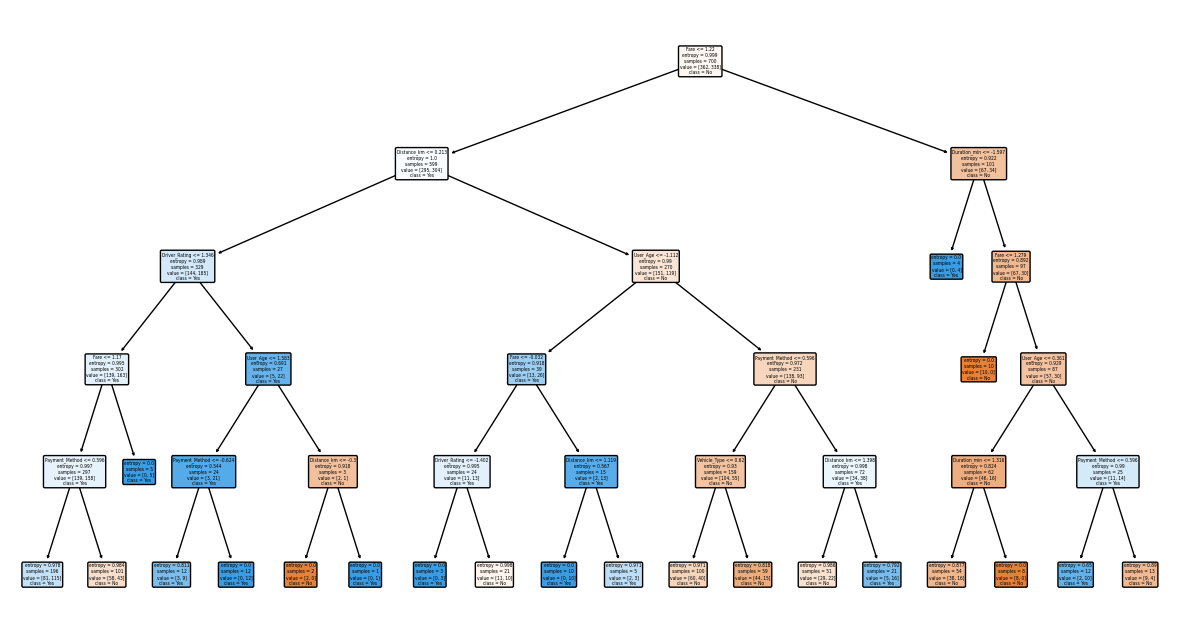

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plot_tree(model, feature_names=independent.columns, class_names=["No", "Yes"], filled=True, rounded=True)
plt.show()

model mse is : 189.78
model mae is : 11.78
model r2 :-8.30


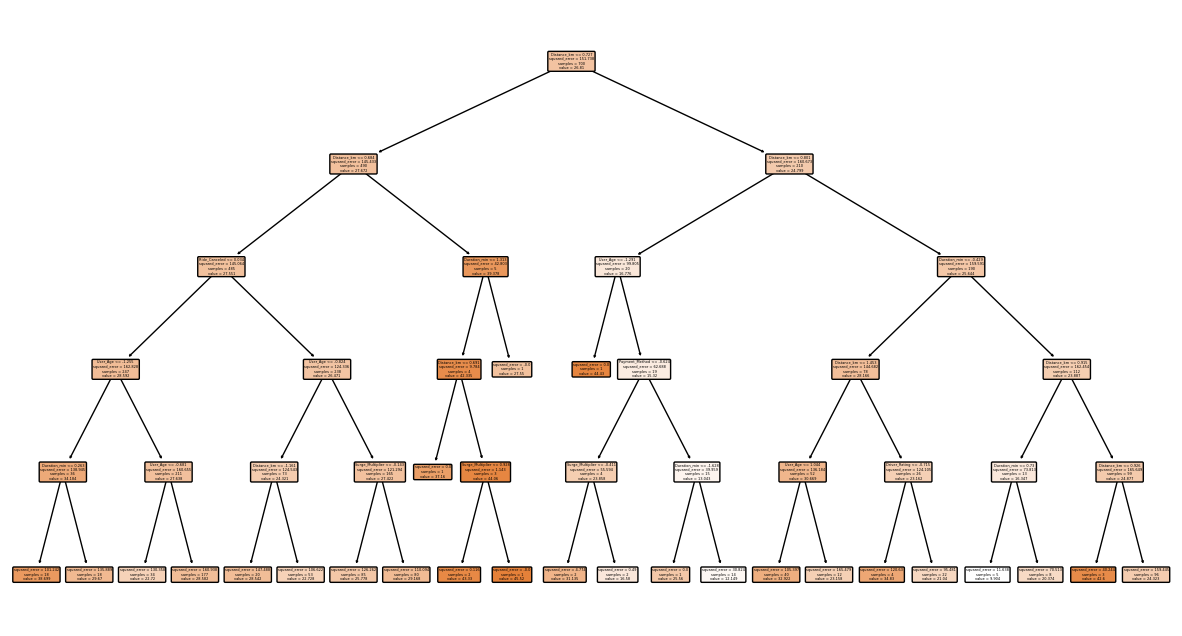

In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

rides_data_new = rides_data.drop(columns=['Ride_ID','Timestamp', 'Origin_Latitude', 'Origin_Longitude', 'Destination_Latitude', 'Destination_Longitude', 'User_ID','Driver_ID'])

catagorial_columns = ['Payment_Method','User_Gender','Vehicle_Type','Ride_Canceled']
label_encoders = {}

for col in catagorial_columns:
    le = LabelEncoder()
    rides_data_new[col] = le.fit_transform(rides_data_new[col])
    label_encoders[col] = le
   
independent = rides_data_new.drop(columns=['Fare'])

dependent = rides_data_new['Fare']

x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.3, random_state=42)

standard = StandardScaler()
x_train_standard = standard.fit_transform(x_train)
x_test_standared = standard.transform(x_test)

model = DecisionTreeRegressor(criterion='squared_error',max_depth=5,random_state=42)
model.fit(x_train_standard,y_train)

predict_decision = model.predict(x_test_standared)

model_mse = mean_squared_error(predict_decision, y_test)

model_mae = mean_absolute_error(predict_decision, y_test)

r2score = r2_score(predict_decision,y_test)

print(f'model mse is : {model_mse:.2f}')
print(f'model mae is : {model_mae:.2f}')
print(f'model r2 :{r2score:.2f}')



import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plot_tree(model, feature_names=independent.columns, class_names=["No", "Yes"], filled=True, rounded=True)
plt.show()


